In [6]:
from inc_angle_trainer import AngleTrainer
from meta_featured_trainer import MetaFeatureTrainer
from resnet import fineTuneResNet50,lessFilterResNet50, paperResNet18, regLessFilterResNet50, SEResNet50
import numpy as np
import pandas as pd
%matplotlib notebook

In [7]:
from sklearn.model_selection import KFold
import torch
from torch.optim import lr_scheduler
import gc
import random


fold_num = 5
random.seed(519)
np.random.seed(519)
kf = KFold(n_splits=fold_num, shuffle=True, random_state=519)
is_transfer_learning = False

## inc_angle trainning + prediction

In [3]:
train_df = pd.read_json('Data/lee_denoised_processed_inc_angle_train.json')
test_df = pd.read_json('Data/lee_denoised_processed_inc_angle_test.json')
test_df.sort_index(inplace=True)

print(train_df.shape, test_df.shape)

(1471, 3) (133, 3)


gpu: 0  available: True


<IPython.core.display.Javascript object>


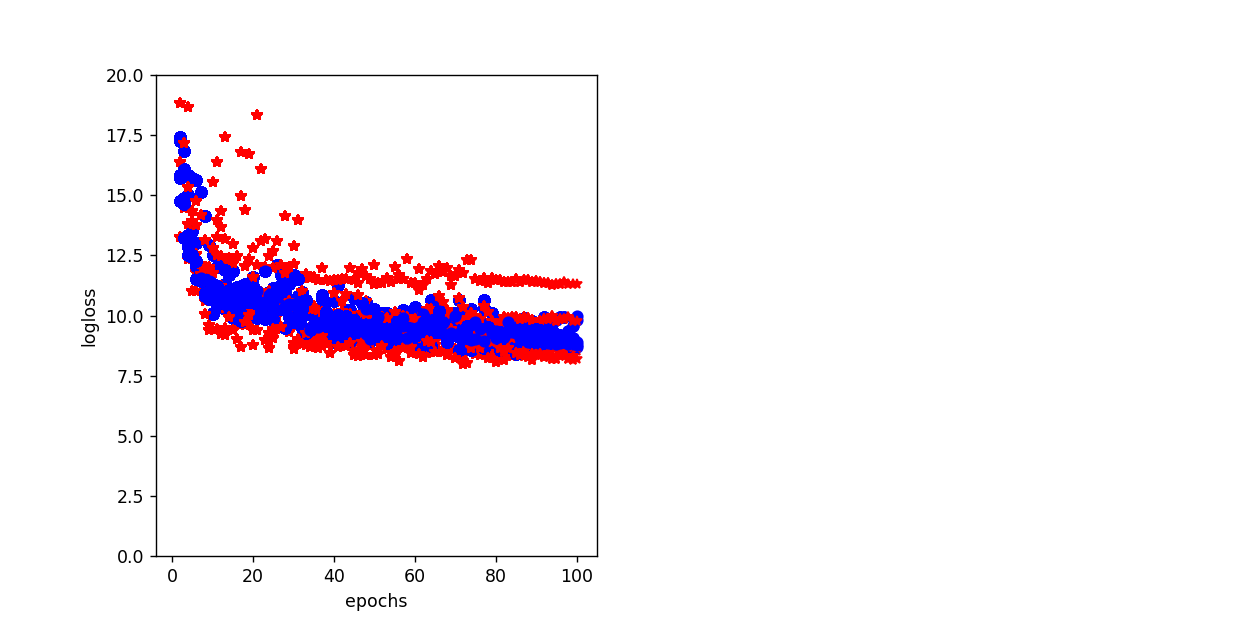

epoch= 1: Train set: Average loss: 326.7078
Valid set: Average loss: 236.4066
Best single model loss:  236.4065704345703
epoch= 2: Train set: Average loss: 17.4267
Valid set: Average loss: 13.2741
Best single model loss:  13.274052302042643
epoch= 3: Train set: Average loss: 16.8250
Valid set: Average loss: 21.3294
Best single model loss:  13.274052302042643
epoch= 4: Train set: Average loss: 15.8319
Valid set: Average loss: 20.5415
Best single model loss:  13.274052302042643
epoch= 5: Train set: Average loss: 15.7207
Valid set: Average loss: 12.5974
Best single model loss:  12.597409884134928
epoch= 6: Train set: Average loss: 15.6379
Valid set: Average loss: 11.8074
Best single model loss:  11.807447751363119
epoch= 7: Train set: Average loss: 15.1184
Valid set: Average loss: 11.0027
Best single model loss:  11.00271193186442
epoch= 8: Train set: Average loss: 14.1567
Valid set: Average loss: 11.9323
Best single model loss:  11.00271193186442
epoch= 9: Train set: Average loss: 12.941

epoch= 70: Train set: Average loss: 10.1046
Valid set: Average loss: 8.2259
Best single model loss:  8.225934982299805
epoch= 71: Train set: Average loss: 10.6369
Valid set: Average loss: 8.5789
Best single model loss:  8.225934982299805
epoch= 72: Train set: Average loss: 10.2231
Valid set: Average loss: 8.9916
Best single model loss:  8.225934982299805
epoch= 73: Train set: Average loss: 9.8938
Valid set: Average loss: 9.8328
Best single model loss:  8.225934982299805
epoch= 74: Train set: Average loss: 10.2878
Valid set: Average loss: 8.5506
Best single model loss:  8.225934982299805
epoch= 75: Train set: Average loss: 9.7559
Valid set: Average loss: 8.5020
Best single model loss:  8.225934982299805
epoch= 76: Train set: Average loss: 9.8004
Valid set: Average loss: 8.3534
Best single model loss:  8.225934982299805
epoch= 77: Train set: Average loss: 10.3241
Valid set: Average loss: 9.2423
Best single model loss:  8.225934982299805
epoch= 78: Train set: Average loss: 9.4212
Valid se

epoch= 39: Train set: Average loss: 9.9899
Valid set: Average loss: 8.8831
Best single model loss:  8.669215202331543
epoch= 40: Train set: Average loss: 10.0304
Valid set: Average loss: 8.7670
Best single model loss:  8.669215202331543
epoch= 41: Train set: Average loss: 11.2639
Valid set: Average loss: 8.8357
Best single model loss:  8.669215202331543
epoch= 42: Train set: Average loss: 9.9155
Valid set: Average loss: 9.7439
Best single model loss:  8.669215202331543
epoch= 43: Train set: Average loss: 9.4793
Valid set: Average loss: 8.8189
Best single model loss:  8.669215202331543
epoch= 44: Train set: Average loss: 10.2147
Valid set: Average loss: 8.7926
Best single model loss:  8.669215202331543
epoch= 45: Train set: Average loss: 10.7219
Valid set: Average loss: 8.5701
Best single model loss:  8.570100466410318
epoch= 46: Train set: Average loss: 9.8408
Valid set: Average loss: 8.3061
Best single model loss:  8.306079864501953
epoch= 47: Train set: Average loss: 10.0724
Valid se

epoch= 77: Train set: Average loss: 9.1820
Valid set: Average loss: 10.4150
Best single model loss:  9.67695426940918
epoch= 78: Train set: Average loss: 9.0823
Valid set: Average loss: 10.1390
Best single model loss:  9.67695426940918
epoch= 79: Train set: Average loss: 8.8996
Valid set: Average loss: 9.7969
Best single model loss:  9.67695426940918
epoch= 80: Train set: Average loss: 9.3432
Valid set: Average loss: 9.6635
Best single model loss:  9.663532892862955
epoch= 81: Train set: Average loss: 8.5635
Valid set: Average loss: 9.7097
Best single model loss:  9.663532892862955
epoch= 82: Train set: Average loss: 9.0040
Valid set: Average loss: 9.9468
Best single model loss:  9.663532892862955
epoch= 83: Train set: Average loss: 9.7548
Valid set: Average loss: 9.8936
Best single model loss:  9.663532892862955
epoch= 84: Train set: Average loss: 8.8784
Valid set: Average loss: 9.9542
Best single model loss:  9.663532892862955
epoch= 85: Train set: Average loss: 9.0234
Valid set: Ave

epoch= 46: Train set: Average loss: 9.1636
Valid set: Average loss: 11.7668
Best single model loss:  11.452289263407389
epoch= 47: Train set: Average loss: 9.4133
Valid set: Average loss: 11.9447
Best single model loss:  11.452289263407389
epoch= 48: Train set: Average loss: 8.9708
Valid set: Average loss: 11.6657
Best single model loss:  11.452289263407389
epoch= 49: Train set: Average loss: 8.9557
Valid set: Average loss: 11.5324
Best single model loss:  11.452289263407389
epoch= 50: Train set: Average loss: 9.2293
Valid set: Average loss: 12.1194
Best single model loss:  11.452289263407389
epoch= 51: Train set: Average loss: 9.0544
Valid set: Average loss: 11.3598
Best single model loss:  11.35981559753418
epoch= 52: Train set: Average loss: 9.0191
Valid set: Average loss: 11.3487
Best single model loss:  11.348711013793945
epoch= 53: Train set: Average loss: 8.8457
Valid set: Average loss: 11.5702
Best single model loss:  11.348711013793945
epoch= 54: Train set: Average loss: 9.380

Valid set: Average loss: 9.9305
Best single model loss:  9.250760078430176
epoch= 15: Train set: Average loss: 10.5089
Valid set: Average loss: 9.4014
Best single model loss:  9.250760078430176
epoch= 16: Train set: Average loss: 10.6774
Valid set: Average loss: 9.0325
Best single model loss:  9.032470862070719
epoch= 17: Train set: Average loss: 10.4967
Valid set: Average loss: 8.6930
Best single model loss:  8.692979017893473
epoch= 18: Train set: Average loss: 10.8760
Valid set: Average loss: 9.7226
Best single model loss:  8.692979017893473
epoch= 19: Train set: Average loss: 10.5795
Valid set: Average loss: 10.0188
Best single model loss:  8.692979017893473
epoch= 20: Train set: Average loss: 10.8058
Valid set: Average loss: 8.7656
Best single model loss:  8.692979017893473
epoch= 21: Train set: Average loss: 11.0279
Valid set: Average loss: 18.3221
Best single model loss:  8.692979017893473
epoch= 22: Train set: Average loss: 10.5191
Valid set: Average loss: 10.9798
Best single m

epoch= 84: Train set: Average loss: 9.3182
Valid set: Average loss: 9.0873
Best single model loss:  7.9860836664835615
epoch= 85: Train set: Average loss: 9.2736
Valid set: Average loss: 8.4661
Best single model loss:  7.9860836664835615
epoch= 86: Train set: Average loss: 9.0854
Valid set: Average loss: 8.3701
Best single model loss:  7.9860836664835615
epoch= 87: Train set: Average loss: 9.3041
Valid set: Average loss: 8.5380
Best single model loss:  7.9860836664835615
epoch= 88: Train set: Average loss: 8.8958
Valid set: Average loss: 8.2637
Best single model loss:  7.9860836664835615
epoch= 89: Train set: Average loss: 9.2965
Valid set: Average loss: 8.3901
Best single model loss:  7.9860836664835615
epoch= 90: Train set: Average loss: 8.8845
Valid set: Average loss: 8.4248
Best single model loss:  7.9860836664835615
epoch= 91: Train set: Average loss: 9.3919
Valid set: Average loss: 8.4114
Best single model loss:  7.9860836664835615
epoch= 92: Train set: Average loss: 9.2543
Valid

In [4]:
counter  = 1
for train_index, valid_index in kf.split(train_df):
  
    model = regLessFilterResNet50(meta_features=1) #paperResNet18() #lessFilterResNet50()
    prefix = 'inc_angle_'
    model_name = 'Trained_model/' + prefix + 'less_filter_resnet_' + str(counter) + '.db'
    
    train = train_df.loc[train_index].reset_index(drop=True)
    valid = train_df.loc[valid_index].reset_index(drop=True)
    
    data_augmentation_args = {
        'mirror': False, # not useful here
        'rotate': True,
        'scale': True,
        'translation': True,
        'crop': False,
        #'color jitter' : True,
    }
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

    tr = AngleTrainer(
            model,
            optimizer,
            epochs=100, 
            milestones=[30, 80],
            gamma=0.2,
            batch_size=128, 
            use_cuda=True, 
            gpu_idx=0,
            best_model_name=model_name,
            verbose=0)

    tr.train(train, valid_df=valid, is_transfer_learning=is_transfer_learning, 
             data_augmentation_args=data_augmentation_args, do_sa=False, t_start=0.005, start_epoch=1300)
    del optimizer, tr, model
    gc.collect()
        
    counter += 1

In [5]:
def predict_inc_angle_with_oof_models(seed=0):
    global fold_num
    
    final_predictions = np.zeros((test_df.shape[0],))
    for counter in range(fold_num):

        is_transfer_learning = False
        model = regLessFilterResNet50(meta_features=1)
        model_name = 'Trained_model/inc_angle_less_filter_resnet_' + str(counter+1)+ '.db'
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

        tr = AngleTrainer(
                model,
                optimizer,
                epochs=1800,
                milestones=[300, 1100, 1600],
                gamma=0.2,
                batch_size=128, 
                use_cuda=True, 
                gpu_idx=0,
                best_model_name = model_name,
                seed=seed,
                verbose=0)

        tr.load_checkpoint()
        
        data_augmentation_args = {
            'mirror': False, # not useful here
            'rotate': True,
            'scale': True,
            'translation': True
        }
        
        predictions = tr.test(test_df, is_transfer_learning=is_transfer_learning, is_augment=True, data_augmentation_args=data_augmentation_args)
        predictions = predictions.reshape((predictions.shape[0],))
        final_predictions += predictions

        del model, optimizer, tr
        
    return final_predictions / (fold_num * 1.0)

In [6]:
submission = pd.DataFrame()
submission['inc_angle'] = np.zeros((test_df.shape[0],))
repeat_count = 40
for i in range(repeat_count):
    print(i, 'round')
    predictions = predict_inc_angle_with_oof_models(seed=i)
    print(predictions)
    submission['inc_angle'] += predictions

submission['inc_angle'] /= repeat_count*1.0
submission.to_csv('Data/inc_angle_out_of_fold_avg_with_augmentation_40_avg.csv', float_format="%.15f", index=False)    

0 round
gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.49434738  40.22172699  37.95262833  38.80181351  35.59559174
  41.45846405  42.46694412  42.3288826   36.22448349  35.78688736
  40.60284424  39.03070374  41.30457153  38.22202988  37.19842834
  42.30792084  39.71636276  36.46882629  40.70131607  39.15300598
  43.24841537  43.12081146  39.64945068  38.48076477  40.69529495
  40.40691071  35.94772339  35.95457916  38.78403168  38.66822433
  36.10783844  38.95147858  42.80821762  42.31793365  41.58459549
  40.51246414  40.94872665  39.23382416  35.44543991  36.23757019
  35.58489609  36.91856842  38.97686615  38.20170288  36.57202301
  40.21578903  43.2290741   38.21282425  38.67076797  38.61693878
  43.68443756  

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.47736053  40.0616806   37.94383545  39.00112762  35.79214935
  41.31134949  42.48578568  42.16403732  36.03705292  35.54743042
  40.60141296  39.23965225  41.18051682  38.16231613  36.59157944
  42.43505554  39.72764053  36.46468201  40.17963257  39.09630585
  42.90302353  42.89405823  39.66482849  38.44746857  40.96888199
  40.54973984  36.48106995  35.51293945  38.86714783  38.71766968
  36.2216423   38.6179451   42.6939415   42.25606842  41.69917068
  40.40971222  40.9842186   39.03338776  35.51448288  36.02249298
  35.49076843  37.25792923  38.81823502  38.22363052  36.69221802
  40.33863754  43.21438751  38.44816055  38.72320786  38.45651321
  43.45550079  37.51939

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.50313644  40.31915817  38.04928589  38.54443436  35.56344376
  41.17508469  42.53255463  42.26193466  35.98871307  35.53062744
  40.65511169  39.35943069  41.25647736  38.17061844  36.77733688
  42.40388718  39.80935822  36.2882988   40.44177017  38.84978638
  43.09935379  42.99594574  39.61020584  38.10857315  40.93387222
  40.62236481  36.38979263  35.68474045  38.94900894  38.53639526
  35.55345001  38.5494194   42.72090302  42.36156082  41.70006638
  40.28706131  41.00555115  38.91677094  35.31156082  35.80583267
  35.63151932  36.84854584  38.99435654  38.36584167  35.56894836
  40.21746674  43.1660141   38.22070618  38.98125534  38.6524025
  43.70153122  37.178678

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.6481987   40.22549057  37.88978348  38.88838501  35.72463684
  41.38494492  42.5580719   42.24604797  36.1717598   35.64184341
  40.42503433  39.23967819  41.33049393  38.20316544  37.69367371
  42.31051407  39.68419266  36.46464767  39.83271027  39.21175003
  43.0031456   43.08614044  39.62080154  38.01738892  40.82062378
  40.53537827  36.03526535  35.65278397  38.84234467  38.56088028
  35.55922089  39.25711517  42.83766327  42.37583008  41.6919754
  40.49732666  41.06259995  38.70923309  35.16442719  36.29380188
  35.46998444  36.81379547  38.95604858  38.01906433  35.91654205
  40.19267654  42.76973801  38.25285187  38.55389175  38.94059601
  43.58461304  37.148217

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.47965698  40.21925507  38.59133759  38.48488235  35.61424026
  41.34365234  42.55647354  42.30052185  36.06163406  35.40306168
  40.65767441  39.34302826  41.34953537  38.32430496  36.69789276
  42.138974    39.82948914  37.05357056  40.53728561  38.89642944
  43.11219177  42.91031952  39.7106781   37.8711586   40.70748978
  40.63688812  36.15011978  35.65381851  39.08936081  38.64651947
  35.75907135  39.40517197  42.81228104  42.26404877  41.49908524
  40.67077866  41.00655212  38.95618744  35.35441589  36.12013779
  35.40591431  36.76778183  38.80862122  38.82100525  36.59167557
  40.27564163  43.18921204  38.24675751  38.58864441  38.8544075
  43.49477005  36.711290

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.60609131  40.30088425  37.91277084  38.31627884  35.54408569
  41.3826416   42.56021042  42.19774857  36.14051132  35.47061615
  40.50189209  39.20199432  41.24010849  38.52799072  37.16390228
  42.4014328   39.5730545   36.4058136   40.17067642  38.96831894
  42.998069    42.90717773  39.65898819  37.56003418  40.84260254
  40.62518539  36.08004532  35.73330612  38.86655655  38.49261017
  35.60088043  39.19850769  42.73849716  42.16946182  41.66957474
  40.33612213  41.04794693  38.66809692  35.42759323  36.21017532
  35.5244957   36.97767258  38.78605576  38.65623398  35.72373047
  40.27302246  43.01389847  38.5749115   39.12070923  39.12423782
  43.73029785  37.56349

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.38676682  40.0618103   38.16059952  38.44051132  35.4305069
  41.25282059  42.59988861  42.14089355  35.98646698  35.55611954
  40.59370728  39.2653717   41.27869263  38.1276413   37.26687927
  42.33387756  39.72575455  36.6102684   40.90439835  38.95509033
  43.06106415  42.77404099  39.74441528  37.44808655  41.08144836
  40.53489304  35.82696304  36.0087677   38.73866425  38.603125
  35.63900375  38.69417877  42.69366684  42.13281326  41.64977875
  40.33271942  40.98086929  38.70911331  35.31942215  36.38409119
  35.70954285  36.73961868  39.14812317  38.4499382   36.57545776
  40.10955658  43.06092377  38.19144745  38.57661514  38.47201996
  43.35547714  36.51288681

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.45211868  40.27709503  38.11137695  38.64927368  35.64453049
  41.27324905  42.58282013  41.99884949  36.23931885  35.50568466
  40.5249115   39.31769638  41.28846054  38.47013321  36.74010696
  42.29832382  39.60945358  36.40088501  40.17093124  39.00987396
  43.17889557  42.96961899  39.54873581  38.18327179  40.74033813
  40.74854584  36.02629852  35.67201538  39.15797043  38.43140182
  35.71209564  38.67629395  42.67618179  42.04167175  41.65212479
  40.71245651  40.89481354  38.84399033  35.392202    36.16289978
  35.71015167  36.54092102  39.02229538  38.62704773  36.06163712
  40.29276886  43.15930557  38.29522934  38.62691269  38.54878311
  43.4755127   37.10975

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.55996552  40.08426056  38.09927902  38.61558609  35.5628746
  41.06163406  42.33794403  42.26355591  36.15907135  35.595121
  40.54549713  39.47921448  41.30108414  38.19010696  36.49540329
  42.32301407  39.91836472  36.91110306  40.59840622  38.93164749
  43.29175797  43.18391724  39.70527878  38.12055588  40.92565613
  40.73503876  36.50005722  35.73457184  38.6729538   38.58725281
  35.63999786  39.26277542  42.8426918   42.17992706  41.65902557
  40.72590256  40.99170456  38.7615036   35.1496994   36.04936676
  35.51140289  36.73447952  39.03394165  38.62420883  36.09900665
  40.16874771  43.05447006  38.35254898  38.69634857  38.45211868
  43.50378189  36.90267868

gpu: 0  available: True
epoch= 70 best_loss= 8.225934982299805
gpu: 0  available: True
epoch= 89 best_loss= 8.140318711598715
gpu: 0  available: True
epoch= 80 best_loss= 9.663532892862955
gpu: 0  available: True
epoch= 62 best_loss= 11.290301005045572
gpu: 0  available: True
epoch= 72 best_loss= 7.9860836664835615
[ 35.47924576  40.17000427  38.04383774  38.45305023  35.56236267
  41.31520233  42.6697937   42.1099617   36.16576691  35.30462646
  40.5651268   39.28120804  41.31275635  37.99430161  37.0780159
  42.42054825  39.56575699  36.44246674  40.23595734  38.9957428
  43.17945023  43.04874496  39.77150879  38.64288177  40.80017014
  40.65012283  35.87847595  35.92074661  38.70703278  38.80621567
  35.82662125  39.23138885  42.78377991  42.29425888  41.61575775
  40.38608704  40.99936142  38.72781525  35.14689407  36.17821198
  35.65713959  36.86641693  39.02085495  37.99740448  35.75437164
  40.18701172  43.20246048  38.44712677  38.63915329  38.78801193
  43.7303688   37.2788353

> concat to be the final meta-featured data to train

In [4]:
df=pd.read_csv('Data/inc_angle_out_of_fold_avg_with_augmentation_40_avg.csv')
inc_angles = df['inc_angle']

In [5]:
old_train = pd.read_json('Data/train.json')
old_train['inc_angle'] = pd.to_numeric(old_train['inc_angle'], errors='coerce')
mask = old_train['inc_angle'].notnull()

In [6]:
meta_featured_train = pd.read_json('Data/lee_na_mean_size_denoised_processed_train.json')
meta_featured_train.sort_index(inplace=True)
meta_featured_train[~mask]['inc_angle'] = inc_angles
meta_featured_train.to_json('Data/lee_na_predicted_size_denoised_processed_train.json')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Meta features training

In [3]:
train_df = pd.read_json('Data/lee_na_predicted_size_denoised_processed_train.json')
print(train_df.shape)

(1604, 5)


gpu: 0  available: True
(321, 1)


<IPython.core.display.Javascript object>


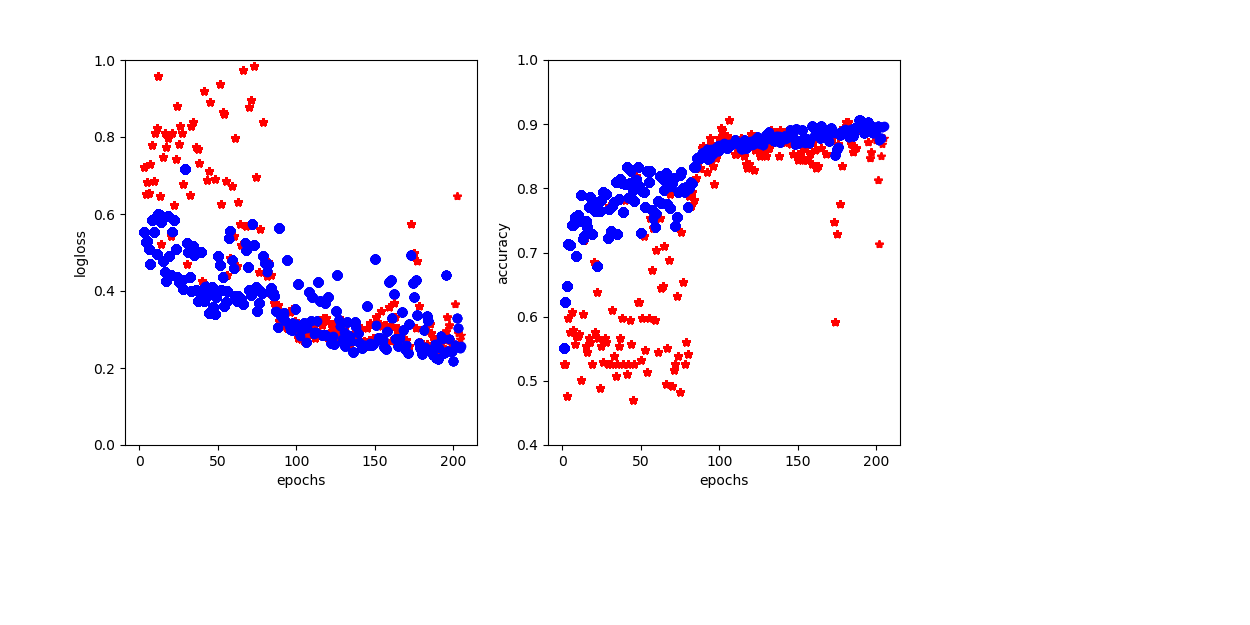

epoch= 1: Train set: Average loss: 5.3483, Accuracy: 707/1283 (55.11%)
Valid set: Average loss: 12.4019, Accuracy: 169/321 (52.65%)
Best single model loss:  12.401856422424316
epoch= 2: Train set: Average loss: 1.0474, Accuracy: 799/1283 (62.28%)
Valid set: Average loss: 9.2296, Accuracy: 169/321 (52.65%)
Best single model loss:  9.229591051737467
epoch= 3: Train set: Average loss: 0.5541, Accuracy: 831/1283 (64.77%)
Valid set: Average loss: 0.7218, Accuracy: 153/321 (47.66%)
Best single model loss:  0.7217951814333597
epoch= 4: Train set: Average loss: 0.5276, Accuracy: 916/1283 (71.40%)
Valid set: Average loss: 0.6520, Accuracy: 192/321 (59.81%)
Best single model loss:  0.6519692341486613
epoch= 5: Train set: Average loss: 0.5294, Accuracy: 913/1283 (71.16%)
Valid set: Average loss: 0.6843, Accuracy: 185/321 (57.63%)
Best single model loss:  0.6519692341486613
epoch= 6: Train set: Average loss: 0.5083, Accuracy: 953/1283 (74.28%)
Valid set: Average loss: 0.6550, Accuracy: 195/321 (60

Best single model loss:  0.3534018099308014
epoch= 48: Train set: Average loss: 0.3411, Accuracy: 1070/1283 (83.40%)
Valid set: Average loss: 0.6897, Accuracy: 200/321 (62.31%)
Best single model loss:  0.3534018099308014
epoch= 49: Train set: Average loss: 0.3849, Accuracy: 1031/1283 (80.36%)
Valid set: Average loss: 1.8557, Accuracy: 200/321 (62.31%)
Best single model loss:  0.3534018099308014
epoch= 50: Train set: Average loss: 0.4905, Accuracy: 938/1283 (73.11%)
Valid set: Average loss: 1.6154, Accuracy: 171/321 (53.27%)
Best single model loss:  0.3534018099308014
epoch= 51: Train set: Average loss: 0.4667, Accuracy: 1022/1283 (79.66%)
Valid set: Average loss: 0.9388, Accuracy: 192/321 (59.81%)
Best single model loss:  0.3534018099308014
epoch= 52: Train set: Average loss: 0.4021, Accuracy: 1019/1283 (79.42%)
Valid set: Average loss: 0.6269, Accuracy: 233/321 (72.59%)
Best single model loss:  0.3534018099308014
epoch= 53: Train set: Average loss: 0.4357, Accuracy: 989/1283 (77.08%)


Valid set: Average loss: 0.3036, Accuracy: 282/321 (87.85%)
Best single model loss:  0.30362213651339215
epoch= 95: Train set: Average loss: 0.3094, Accuracy: 1106/1283 (86.20%)
Valid set: Average loss: 0.3046, Accuracy: 279/321 (86.92%)
Best single model loss:  0.30362213651339215
epoch= 96: Train set: Average loss: 0.3003, Accuracy: 1096/1283 (85.42%)
Valid set: Average loss: 0.3456, Accuracy: 268/321 (83.49%)
Best single model loss:  0.30362213651339215
epoch= 97: Train set: Average loss: 0.2999, Accuracy: 1102/1283 (85.89%)
Valid set: Average loss: 0.3533, Accuracy: 259/321 (80.69%)
Best single model loss:  0.30362213651339215
epoch= 98: Train set: Average loss: 0.3170, Accuracy: 1109/1283 (86.44%)
Valid set: Average loss: 0.3128, Accuracy: 272/321 (84.74%)
Best single model loss:  0.30362213651339215
epoch= 99: Train set: Average loss: 0.3525, Accuracy: 1102/1283 (85.89%)
Valid set: Average loss: 0.3211, Accuracy: 275/321 (85.67%)
Best single model loss:  0.30362213651339215
epoch

Valid set: Average loss: 0.2995, Accuracy: 280/321 (87.23%)
Best single model loss:  0.2628292093674342
epoch= 141: Train set: Average loss: 0.2629, Accuracy: 1132/1283 (88.23%)
Valid set: Average loss: 0.3047, Accuracy: 280/321 (87.23%)
Best single model loss:  0.2628292093674342
epoch= 142: Train set: Average loss: 0.2509, Accuracy: 1126/1283 (87.76%)
Valid set: Average loss: 0.2685, Accuracy: 280/321 (87.23%)
Best single model loss:  0.2628292093674342
epoch= 143: Train set: Average loss: 0.2588, Accuracy: 1127/1283 (87.84%)
Valid set: Average loss: 0.2707, Accuracy: 282/321 (87.85%)
Best single model loss:  0.2628292093674342
epoch= 144: Train set: Average loss: 0.2588, Accuracy: 1132/1283 (88.23%)
Valid set: Average loss: 0.2577, Accuracy: 286/321 (89.10%)
Best single model loss:  0.2576600859562556
epoch= 145: Train set: Average loss: 0.3621, Accuracy: 1143/1283 (89.09%)
Valid set: Average loss: 0.3044, Accuracy: 280/321 (87.23%)
Best single model loss:  0.2576600859562556
epoch=

epoch= 187: Train set: Average loss: 0.2325, Accuracy: 1150/1283 (89.63%)
Valid set: Average loss: 0.2811, Accuracy: 277/321 (86.29%)
Best single model loss:  0.24581733842690787
epoch= 188: Train set: Average loss: 0.2626, Accuracy: 1148/1283 (89.48%)
Valid set: Average loss: 0.2522, Accuracy: 288/321 (89.72%)
Best single model loss:  0.24581733842690787
epoch= 189: Train set: Average loss: 0.2251, Accuracy: 1163/1283 (90.65%)
Valid set: Average loss: 0.2508, Accuracy: 288/321 (89.72%)
Best single model loss:  0.24581733842690787
epoch= 190: Train set: Average loss: 0.2227, Accuracy: 1163/1283 (90.65%)
Valid set: Average loss: 0.2474, Accuracy: 286/321 (89.10%)
Best single model loss:  0.24581733842690787
epoch= 191: Train set: Average loss: 0.2510, Accuracy: 1155/1283 (90.02%)
Valid set: Average loss: 0.2477, Accuracy: 287/321 (89.41%)
Best single model loss:  0.24581733842690787
epoch= 192: Train set: Average loss: 0.2830, Accuracy: 1137/1283 (88.62%)
Valid set: Average loss: 0.2707

In [ ]:
counter  = 1
for train_index, valid_index in kf.split(train_df):
  
    model = SEResNet50(meta_features=3) #paperResNet18() #lessFilterResNet50()
    prefix = 'meta_features_'
    model_name = 'Trained_model/' + prefix + 'long_seresnet_' + str(counter) + '.db'
    
    train = train_df.loc[train_index].reset_index(drop=True)
    valid = train_df.loc[valid_index].reset_index(drop=True)
    
    data_augmentation_args = {
        'mirror': False, # not useful here
        'rotate': True,
        'scale': True,
        'translation': True,
        'crop': False,
        #'color jitter' : True,
    }
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

    tr = MetaFeatureTrainer(
            model,
            optimizer,
            epochs=600, 
            milestones=[80, 450],
            gamma=0.1,
            batch_size=128, 
            use_cuda=True, 
            gpu_idx=0,
            best_model_name=model_name,
            verbose=0)

    tr.train(train, valid_df=valid, is_transfer_learning=is_transfer_learning, 
             data_augmentation_args=data_augmentation_args, do_sa=False, t_start=0.005, start_epoch=1300)
    del optimizer, tr, model
    gc.collect()
        
    counter += 1

In [4]:
def predict_with_oof_models(seed=0):
    global fold_num
    
    final_predictions = np.zeros((test_df.shape[0],))
    for counter in range(fold_num):

        is_transfer_learning = False
        model = SEResNet50(meta_features=3)
        model_name = 'Trained_model/meta_features_seresnet_' + str(counter+1)+ '.db'
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)

        tr = MetaFeatureTrainer(
                model,
                optimizer,
                epochs=1800,
                milestones=[300, 1100, 1600],
                gamma=0.2,
                batch_size=128, 
                use_cuda=True, 
                gpu_idx=0,
                best_model_name = model_name,
                seed=seed,
                verbose=0)

        tr.load_checkpoint()
        
        data_augmentation_args = {
            'mirror': False, # not useful here
            'rotate': True,
            'scale': True,
            'translation': True
        }
        
        predictions = tr.test(test_df, is_transfer_learning=is_transfer_learning, is_augment=True, data_augmentation_args=data_augmentation_args)
        predictions = predictions.reshape((predictions.shape[0],))
        final_predictions += predictions

        del model, optimizer, tr
        
    return final_predictions / (fold_num * 1.0)

In [8]:
test_df = pd.read_json('Data/test.json')
print(test_df.shape)
test_ids = test_df['id']
del test_df
gc.collect()
test_df = pd.read_json('Data/lee_na_mean_size_denoised_processed_test.json')
test_df.sort_index(inplace=True)


submission = pd.DataFrame()
submission['is_iceberg'] = np.zeros((test_df.shape[0],))
repeat_count = 40
for i in range(repeat_count):
    print(i, 'round')
    predictions = predict_with_oof_models(seed=i)
    print(predictions)
    submission['is_iceberg'] += predictions

submission['is_iceberg'] /= repeat_count*1.0


(8424, 4)
0 round
gpu: 0  available: True
epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available: True
epoch= 248 best_loss= 0.20023420577247938
gpu: 0  available: True
epoch= 235 best_loss= 0.2377981555958589
gpu: 0  available: True
epoch= 255 best_loss= 0.23871508240699768
[ 0.00801486  0.37288887  0.0335908  ...,  0.1002144   0.9922346
  0.02835763]
1 round
gpu: 0  available: True
epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available: True
epoch= 248 best_loss= 0.20023420577247938
gpu: 0  available: True
epoch= 235 best_loss= 0.2377981555958589
gpu: 0  available: True
epoch= 255 best_loss= 0.23871508240699768
[ 0.01117882  0.48694562  0.01666337 ...,  0.05909653  0.99253191
  0.00284986]
2 round
gpu: 0  available: True
epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available

epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available: True
epoch= 248 best_loss= 0.20023420577247938
gpu: 0  available: True
epoch= 235 best_loss= 0.2377981555958589
gpu: 0  available: True
epoch= 255 best_loss= 0.23871508240699768
[ 0.02674494  0.43774305  0.09848892 ...,  0.25321367  0.99004904
  0.00271008]
20 round
gpu: 0  available: True
epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available: True
epoch= 248 best_loss= 0.20023420577247938
gpu: 0  available: True
epoch= 235 best_loss= 0.2377981555958589
gpu: 0  available: True
epoch= 255 best_loss= 0.23871508240699768
[  7.68881749e-03   4.53400981e-01   4.23269533e-02 ...,   3.69594532e-01
   9.90167844e-01   3.54505896e-04]
21 round
gpu: 0  available: True
epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available: True
ep

gpu: 0  available: True
epoch= 248 best_loss= 0.20023420577247938
gpu: 0  available: True
epoch= 235 best_loss= 0.2377981555958589
gpu: 0  available: True
epoch= 255 best_loss= 0.23871508240699768
[  9.04557514e-03   4.26115108e-01   6.15941013e-02 ...,   8.54406528e-02
   9.93252003e-01   7.61795390e-04]
39 round
gpu: 0  available: True
epoch= 299 best_loss= 0.22576389710108438
gpu: 0  available: True
epoch= 202 best_loss= 0.15976044054453573
gpu: 0  available: True
epoch= 248 best_loss= 0.20023420577247938
gpu: 0  available: True
epoch= 235 best_loss= 0.2377981555958589
gpu: 0  available: True
epoch= 255 best_loss= 0.23871508240699768
[  1.31285693e-02   4.18443406e-01   1.31435096e-01 ...,   3.18309660e-01
   9.92846131e-01   1.63098582e-04]


In [9]:
submission['id'] = test_ids
submission.to_csv('Submissions/submission_seresnet_meta_w_inc_angle_out_of_fold_avg_with_augmentation_40_avg.csv', float_format="%.15f", index=False)    